In [1]:
import ImageLoader
import ImageCompare
import database
import matplotlib.pyplot as plt
import matplotlib.patches as patches
%matplotlib notebook

In [10]:
def identify(save=True):
    """
    Takes a picture with configured camera and identifies all of the faces in the picture
    Parameters:
    -----------
    save (boolean):
        whether or not to add the captured image to the database
    
    Returns:
    --------
    names (list)
        the list of the name of each person in the picture
    """
    descs = ImageLoader.describe()
    names = ImageCompare.compare_faces(descs, database.database)
    if save:
        if len(descs) > 1:
                print("Cannot add multiple people at once.")
        else:
            database.add_image(descs[0], name=names[0])
    return names

In [3]:
def draw_faces(detections, people, img):
    """
    Draws bounding boxes over image, and labels them with people.
    
    Parameters
    ----------
    detections: list of rectangles
        List of bounding box rectangles corresponding to the position of each detected face.
    people: list of strings
        List of the keys/names of people as found by compare_faces(), or None if no match is found.
    img: numpy array, shape (480, 640, 3)
        The array representing the image.
    """
    fig, ax = plt.subplots()
    ax.imshow(img)
    for i in range(len(detections)):
        d = detections[i]
        rect = patches.Rectangle((d.left(), d.top()), d.width(), d.height(), fill=False, color='white')
        ax.add_patch(rect)
        if people[i] is not None:
            ax.text(d.left(), d.top() + d.height() + 22, people[i], color='white')
    plt.show()

In [4]:
def go():
    test = ImageLoader.get_img_from_camera()
    draw_faces(ImageLoader.find_faces(test), ImageCompare.compare_faces(ImageLoader.find_descriptors(test, ImageLoader.find_faces(test)), database.database), test)

In [15]:
identify(save=True)

['Griffin Eslinger']

<IPython.core.display.Javascript object>


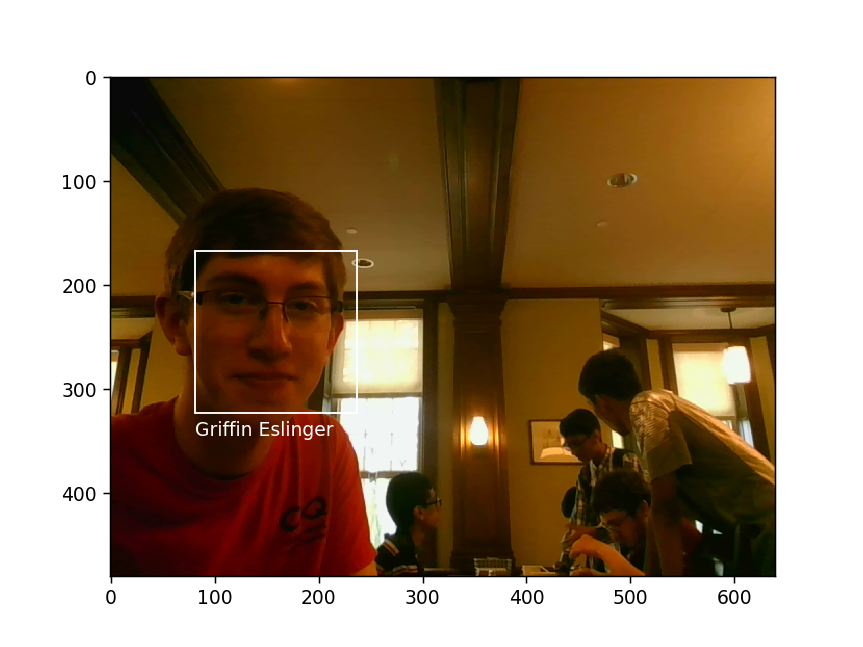

In [16]:
go()

In [ ]:
def add_file(filepath):
    """
    Adds a person to the file from 
    
    Parameters
    ----------
    detections: list of rectangles
        List of bounding box rectangles corresponding to the position of each detected face.
    people: list of strings
        List of the keys/names of people as found by compare_faces(), or None if no match is found.
    img: numpy array, shape (480, 640, 3)
        The array representing the image.
    """